# - Problem Definition and Understanding

In a highly competitive market with increasing demand, a leading Superstore Giant seeks data-driven insights to optimize its business strategies. The goal is to identify high-performing and underperforming products, regions, categories, and customer segments. This analysis will help determine which areas to prioritize for growth and which to reconsider or optimize to maximize profitability and efficiency.


# - Let's Explore our Data!

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import chardet

with open('Superstore.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [272]:
df = pd.read_csv('Superstore.csv', encoding='windows-1252')

In [273]:
df.to_csv('Superstore_utf8.csv', index=False, encoding='utf-8')
df = pd.read_csv('Superstore_utf8.csv')

In [274]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,9/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,9/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11/10/2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11/10/2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [275]:
(rows,columns) = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 9994
Number of columns: 21


In [276]:
df.info()                            #Infromation about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [277]:
def colDetails():
  '''User defined function for showing value counts of each column'''
  for i in df.columns:
      x = df[i].value_counts()
      print("Column name is:",i,"and its values are:\n",x)
colDetails()

Column name is: Row ID and its values are:
 Row ID
1       1
6666    1
6659    1
6660    1
6661    1
       ..
3333    1
3334    1
3335    1
3336    1
9994    1
Name: count, Length: 9994, dtype: int64
Column name is: Order ID and its values are:
 Order ID
CA-2014-100111    14
CA-2014-157987    12
CA-2013-165330    11
US-2013-108504    11
CA-2012-131338    10
                  ..
CA-2013-157259     1
CA-2014-107986     1
US-2012-112508     1
US-2013-126844     1
CA-2014-119914     1
Name: count, Length: 5009, dtype: int64
Column name is: Order Date and its values are:
 Order Date
6/9/2013      38
3/9/2014      36
11/11/2013    35
3/12/2014     34
2/12/2014     34
              ..
25-02-2013     1
26-10-2013     1
22-02-2011     1
19-10-2013     1
22-01-2011     1
Name: count, Length: 1238, dtype: int64
Column name is: Ship Date and its values are:
 Ship Date
16-12-2012    35
27-09-2014    34
7/12/2014     32
22-11-2014    32
7/9/2014      30
              ..
4/3/2011       1
12/2/2014  

In [285]:
df.isnull().sum()   #Checking for NULL values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [287]:
df.drop(['Row ID'],axis=1,inplace=True)
#As the 'Row ID' is unique for each row maybe this is preventing from detecting duplicate rows.Let us drop the 'Row ID' column.

In [289]:
df[df.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3406,US-2011-150119,23-04-2011,27-04-2011,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [291]:
df[df.duplicated(keep=False)]  #After dropping the 'Row ID' column, we see that there are duplicate rows. we will drop them.

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,US-2011-150119,23-04-2011,27-04-2011,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,US-2011-150119,23-04-2011,27-04-2011,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [293]:
df.drop_duplicates(inplace=True)

In [295]:
# Get the unique values in the "Ship Mode" column
unique_ship_modes = df['Ship Mode'].unique()
# Print the unique values
print(unique_ship_modes)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [297]:
# Get the unique values in the "Segment" column
unique_segment = df['Segment'].unique()
# Print the unique values
print(unique_segment)

['Consumer' 'Corporate' 'Home Office']


In [299]:
# Get the unique values in the "Country" column
unique_country = df['Country'].unique()
# Print the unique values
print(unique_country)

['United States']


In [301]:
# Get the unique values in the "State" column
unique_state = df['State'].unique()
# Print the unique values
print(unique_state)

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [303]:
# Get the unique values in the "Region" column
unique_region = df['Region'].unique()
# Print the unique values
print(unique_region)

['South' 'West' 'Central' 'East']


In [305]:
# Get the unique values in the "Category" column
unique_category = df['Category'].unique()
# Print the unique values
print(unique_category)

['Furniture' 'Office Supplies' 'Technology']


In [307]:
# Get the unique values in the "Sub-Category" column
unique_Sub_Category = df['Sub-Category'].unique()
# Print the unique values
print(unique_Sub_Category)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [309]:
(rows,columns) = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 9993
Number of columns: 20


In [311]:
# Replace "-" with "/" in "Order Date" and "Ship Date" columns
df['Order Date'] = df['Order Date'].str.replace(r'[-. ]', '/', regex=True)
df['Ship Date'] = df['Ship Date'].str.replace(r'[-. ]', '/', regex=True)

# Save the changes
df.to_csv('Superstore_utf8.csv', index=False)

In [313]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2013-152156,9/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2013-152156,9/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2013-138688,13/06/2013,17/06/2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2012-108966,11/10/2012,18/10/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2012-108966,11/10/2012,18/10/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [315]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')

In [317]:
df['Diff b/w order and ship date'] = df['Ship Date'] - df['Order Date']

In [319]:
df['Diff b/w order and ship date'].value_counts()

Diff b/w order and ship date
4 days    2770
5 days    2175
2 days    1332
6 days    1201
3 days    1007
7 days     621
0 days     519
1 days     368
Name: count, dtype: int64

In [321]:
df['Diff b/w order and ship date']=df['Diff b/w order and ship date'].dt.days
#dropping 'days' word from the values

In [323]:
df['Diff b/w order and ship date'].value_counts()

Diff b/w order and ship date
4    2770
5    2175
2    1332
6    1201
3    1007
7     621
0     519
1     368
Name: count, dtype: int64

In [325]:
#Converting 'Order Date' and 'Ship Date' columns to [day,month,year] columns
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day of Week'] = df['Order Date'].dt.dayofweek

In [327]:
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Day of Week'] = df['Ship Date'].dt.dayofweek

In [329]:
df.drop(['Order Date','Ship Date'],axis=1,inplace=True)

In [331]:
df.info()                         #Infromation about the pre-processed dataset

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order ID                      9993 non-null   object 
 1   Ship Mode                     9993 non-null   object 
 2   Customer ID                   9993 non-null   object 
 3   Customer Name                 9993 non-null   object 
 4   Segment                       9993 non-null   object 
 5   Country                       9993 non-null   object 
 6   City                          9993 non-null   object 
 7   State                         9993 non-null   object 
 8   Postal Code                   9993 non-null   int64  
 9   Region                        9993 non-null   object 
 10  Product ID                    9993 non-null   object 
 11  Category                      9993 non-null   object 
 12  Sub-Category                  9993 non-null   object 
 13  Product 

In [333]:
# Convert numeric months to abbreviated month names
df["Order Month"] = df["Order Month"].apply(lambda x: calendar.month_abbr[x])

In [337]:
df.to_excel('superstore.xlsx',  index=False, engine='openpyxl')

--


**After we have a clear understanding of what the data is all about, the next step is to present it in the form of charts, making it easier to digest and visualize for better understanding.**

# - Now, let’s turn our data into insights!


# -- Customer Insights

1️⃣ Top 5 Customers by Number of Products Purchased

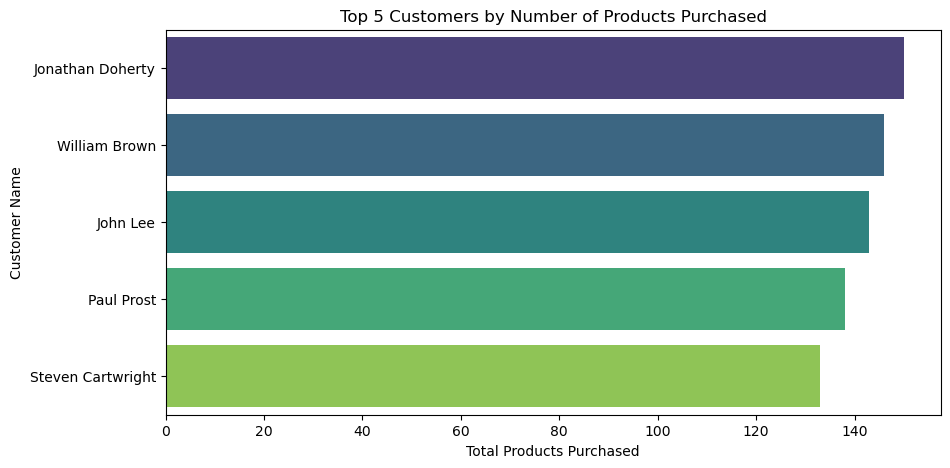

In [73]:
top_customers = df.groupby("Customer Name")["Quantity"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, hue=top_customers.index, palette="viridis", legend=False)
plt.xlabel("Total Products Purchased")
plt.ylabel("Customer Name")
plt.title("Top 5 Customers by Number of Products Purchased")
plt.show()

2️⃣ Customer with Highest Total Spending

Top 5 Customers by Total Sales:
Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64


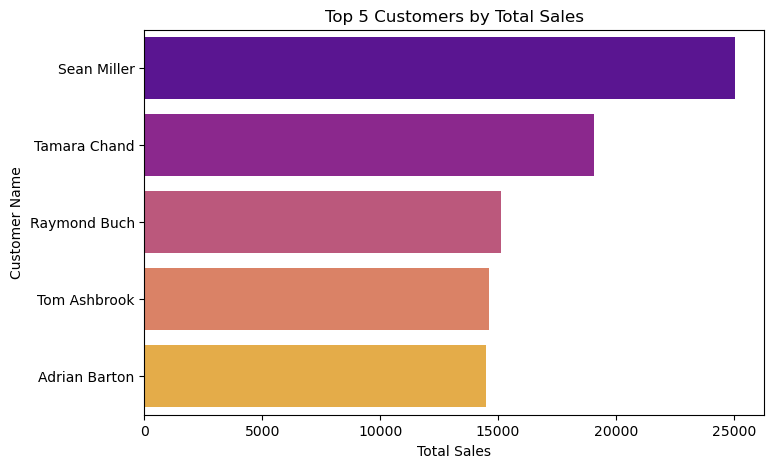

In [80]:
# Calculate the top 5 customers based on total sales
top_customers_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(5)

# Print the results
print("Top 5 Customers by Total Sales:")
print(top_customers_sales)

# Plot the top 5 customers by total sales
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers_sales.values, y=top_customers_sales.index, hue=top_customers_sales.index, palette="plasma", legend=False)
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.title("Top 5 Customers by Total Sales")
plt.show()


3️⃣ Total Sales by Customer Segment

Total Sales by Customer Segment:
Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.293718e+05
Name: Sales, dtype: float64


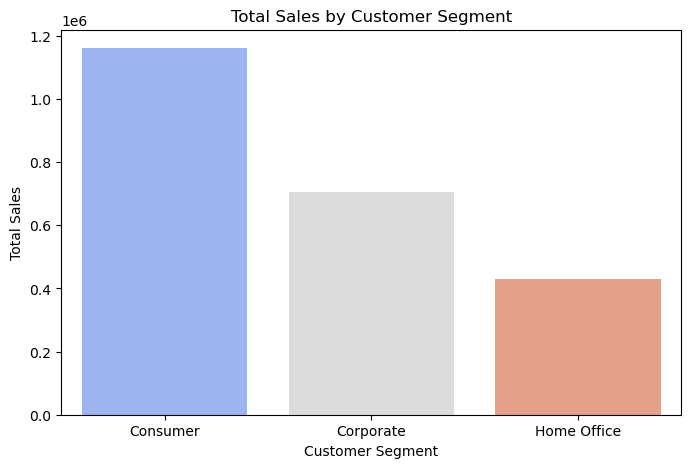

In [85]:
segment_sales = df.groupby("Segment")["Sales"].sum().sort_values(ascending=False)

print("Total Sales by Customer Segment:")
print(segment_sales)

plt.figure(figsize=(8, 5))
sns.barplot(x=segment_sales.index, y=segment_sales.values, hue=segment_sales.index, palette="coolwarm", legend=False)
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.title("Total Sales by Customer Segment")
plt.show()

4️⃣ Segment with the Most Purchases

In [92]:
top_segment = df.groupby("Segment")["Quantity"].sum().idxmax()
print(f"The segment with the most purchases is: {top_segment}")


The segment with the most purchases is: Consumer


5️⃣ Average Order Value (AOV) for Each Customer Segment

Average Order Value (AOV) per Customer Segment:
Segment
Home Office    472.356190
Corporate      466.411075
Consumer       449.111116
Name: AOV, dtype: float64


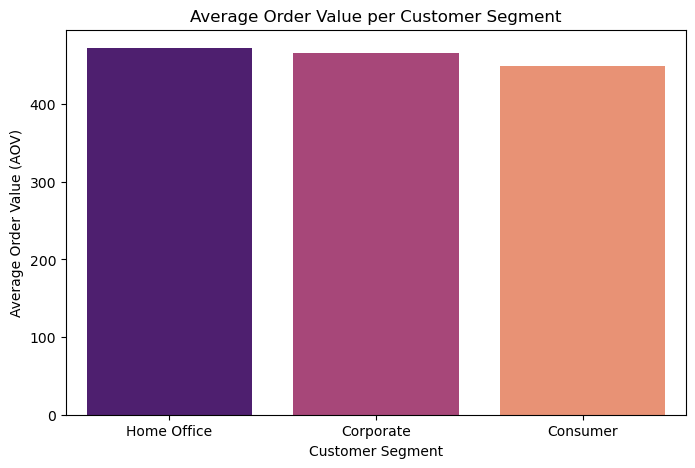

In [97]:
# 🔹 Calculate Average Order Value (AOV) per Customer Segment
aov_per_segment = df.groupby("Segment").agg({"Sales": "sum", "Order ID": pd.Series.nunique})
aov_per_segment["AOV"] = aov_per_segment["Sales"] / aov_per_segment["Order ID"]
aov_per_segment = aov_per_segment["AOV"].sort_values(ascending=False)

print("Average Order Value (AOV) per Customer Segment:")
print(aov_per_segment)

# 🔹 Visualization (Fixed)
plt.figure(figsize=(8, 5))
sns.barplot(x=aov_per_segment.index, y=aov_per_segment.values, hue=aov_per_segment.index, palette="magma", legend=False)
plt.xlabel("Customer Segment")
plt.ylabel("Average Order Value (AOV)")
plt.title("Average Order Value per Customer Segment")
plt.show()

6️⃣ Number of Unique Customers per Region


Unique Customers per Region:
Region
West       686
East       674
Central    629
South      512
Name: Customer ID, dtype: int64


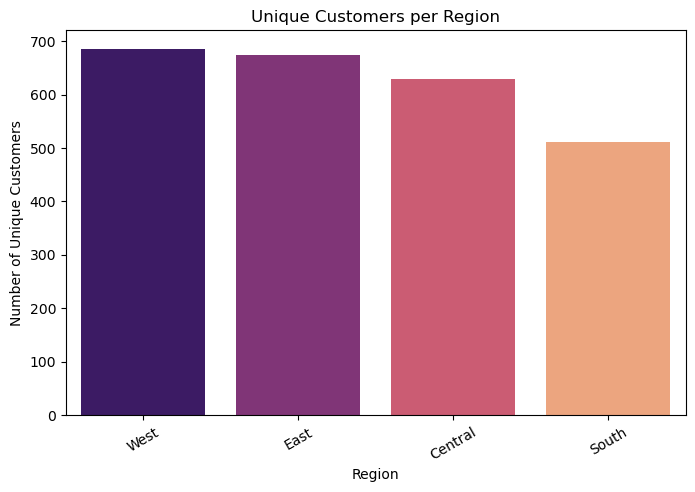

In [102]:
# 🔹 Count Unique Customers per Region
unique_customers_per_region = df.groupby("Region")["Customer ID"].nunique().sort_values(ascending=False)

print("\nUnique Customers per Region:")
print(unique_customers_per_region)

# 🔹 Visualization (Fixed)
plt.figure(figsize=(8, 5))
sns.barplot(x=unique_customers_per_region.index, y=unique_customers_per_region.values, hue=unique_customers_per_region.index, palette="magma", legend=False)
plt.xlabel("Region")
plt.ylabel("Number of Unique Customers")
plt.title("Unique Customers per Region")
plt.xticks(rotation=30)
plt.show()

# -- Product Insights

1️⃣ Top 10 Products by Money Spent (Sales Revenue)

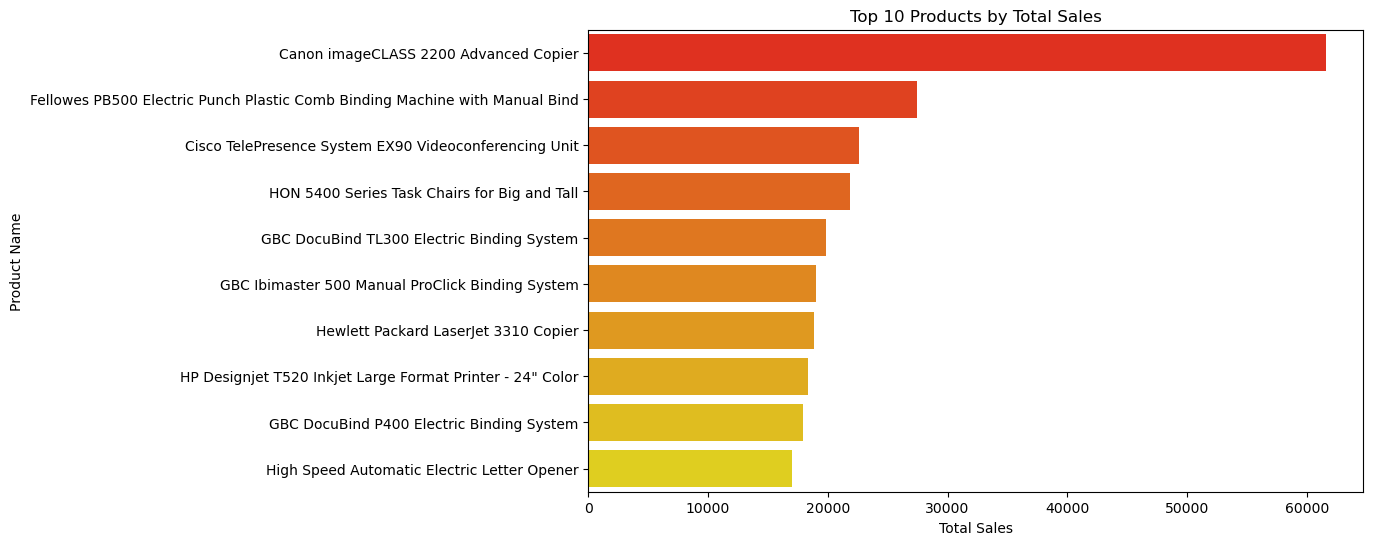

In [107]:
top_10_products_sales = df.groupby("Product Name")['Sales'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_products_sales.values, y=top_10_products_sales.index, hue=top_10_products_sales.index, legend=False, palette="autumn")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Top 10 Products by Total Sales")
plt.show()

2️⃣ Top 10 products by number of orders

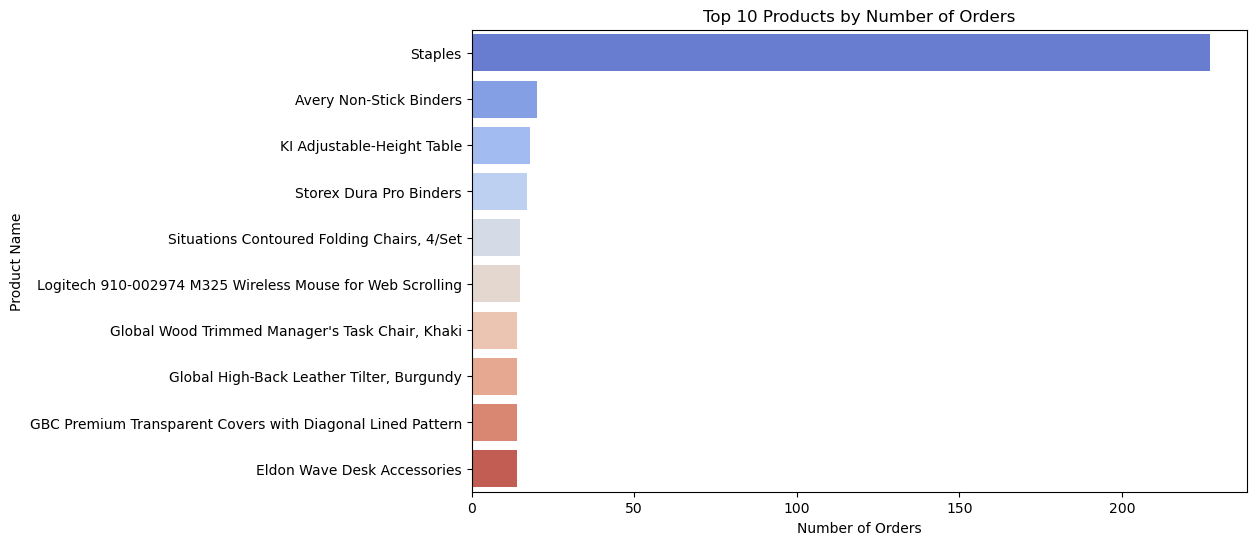

In [110]:
top_10_products_orders = df["Product Name"].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_products_orders.values, y=top_10_products_orders.index, hue=top_10_products_orders.index, legend=False, palette="coolwarm")
plt.xlabel("Number of Orders")
plt.ylabel("Product Name")
plt.title("Top 10 Products by Number of Orders")
plt.show()

3️⃣ Subcategory with most sales

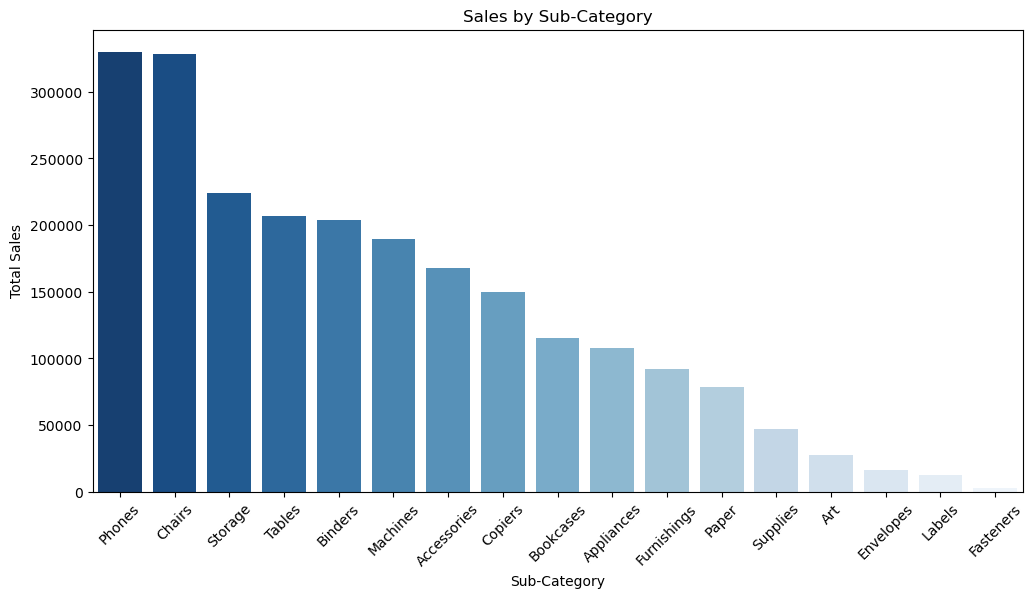

In [117]:
subcategory_sales = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values, hue=subcategory_sales.index, legend=False, palette="Blues_r")
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.title("Sales by Sub-Category")
plt.show()

4️⃣ Average sales by product category

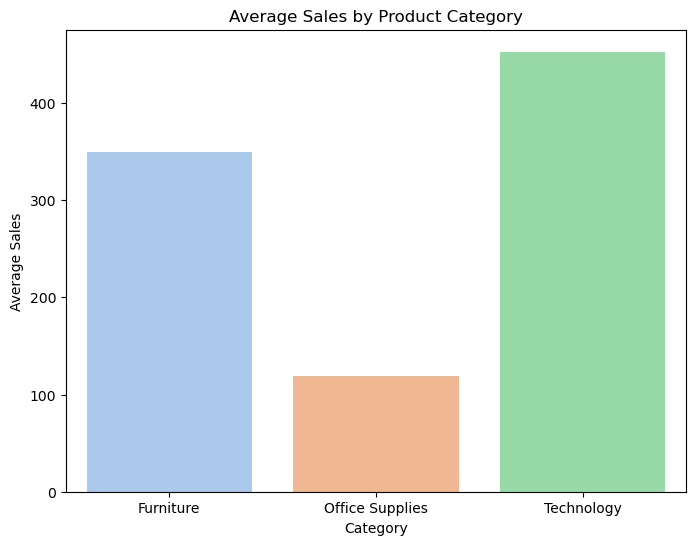

In [120]:
category_avg_sales = df.groupby("Category")["Sales"].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_avg_sales.index, y=category_avg_sales.values, hue=category_avg_sales.index, legend=False, palette="pastel")
plt.xlabel("Category")
plt.ylabel("Average Sales")
plt.title("Average Sales by Product Category")
plt.show()

5️⃣ Least purchased products (by number of orders)

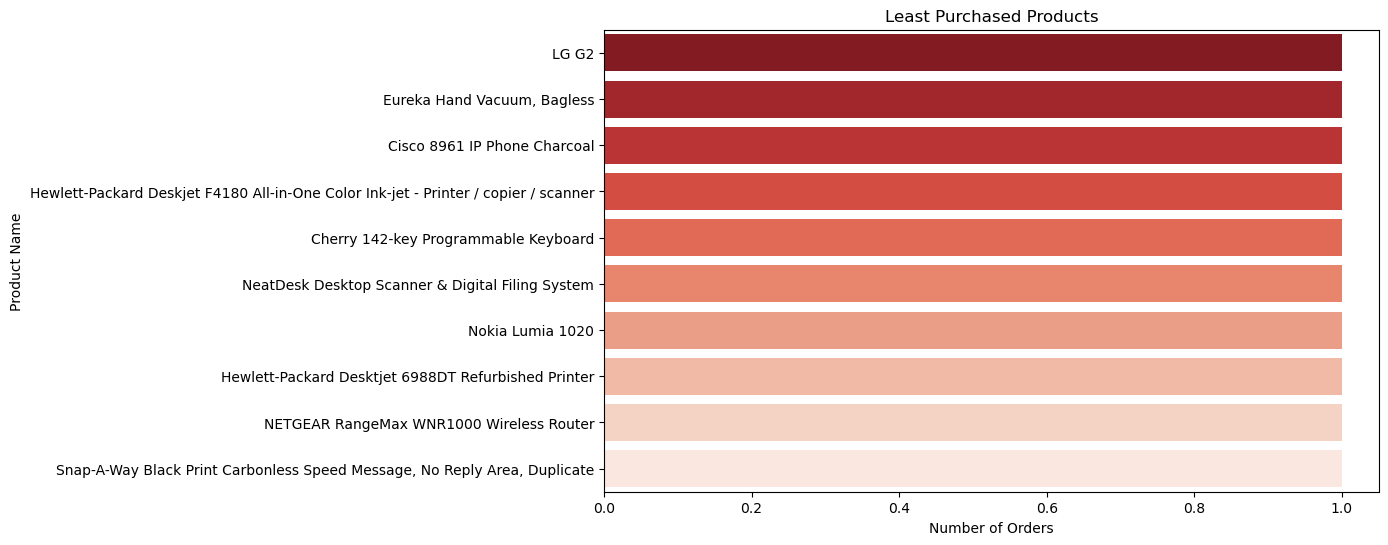

In [131]:
least_purchased_products = df["Product Name"].value_counts().nsmallest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=least_purchased_products.values, y=least_purchased_products.index, hue=least_purchased_products.index, legend=False, palette="Reds_r")
plt.xlabel("Number of Orders")
plt.ylabel("Product Name")
plt.title("Least Purchased Products")
plt.show()

6️⃣ Most profitable subcategories

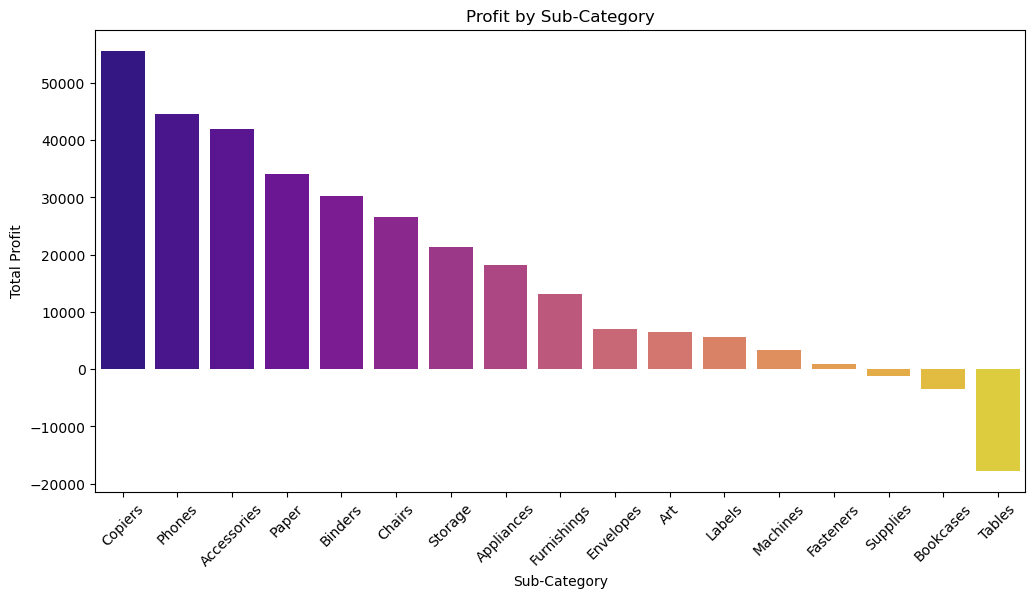

In [134]:
subcategory_profit = df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_profit.index, y=subcategory_profit.values, hue=subcategory_profit.index, legend=False, palette="plasma")
plt.xlabel("Sub-Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.title("Profit by Sub-Category")
plt.show()

7️⃣ Average discount by category

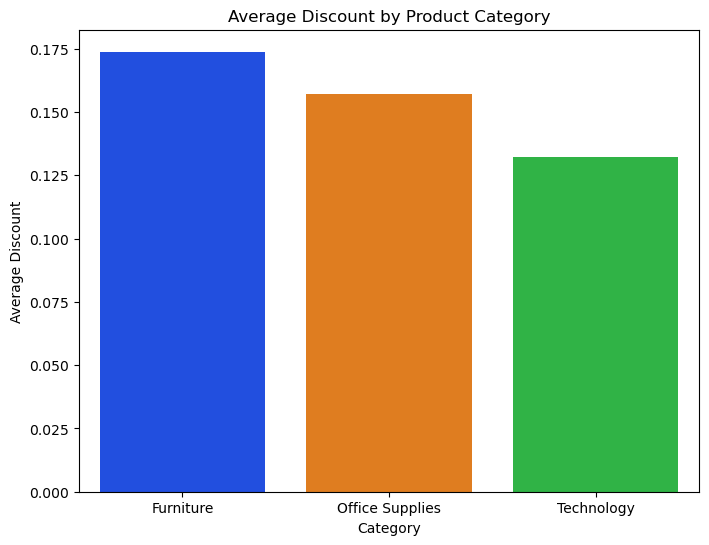

In [137]:
category_avg_discount = df.groupby("Category")["Discount"].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_avg_discount.index, y=category_avg_discount.values, hue=category_avg_discount.index, legend=False, palette="bright")
plt.xlabel("Category")
plt.ylabel("Average Discount")
plt.title("Average Discount by Product Category")
plt.show()

8️⃣ Detect underperforming categories (low sales & low profit)

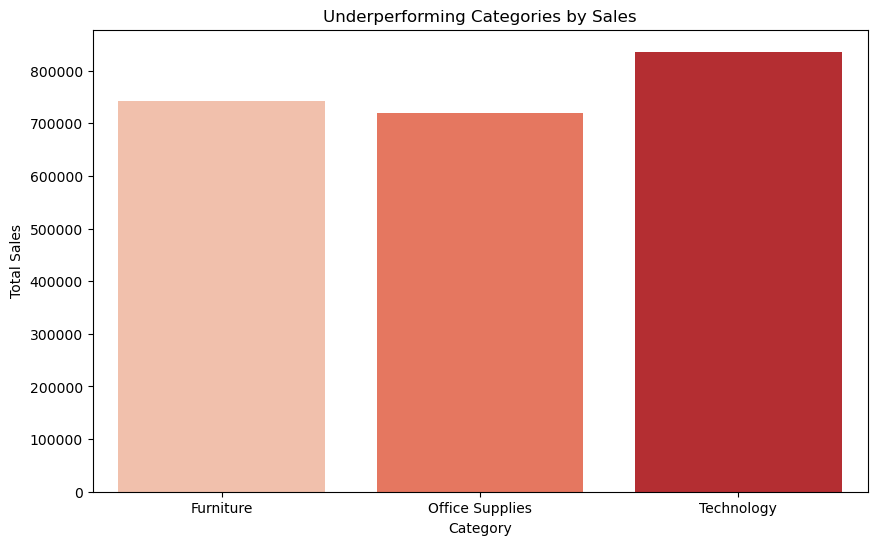

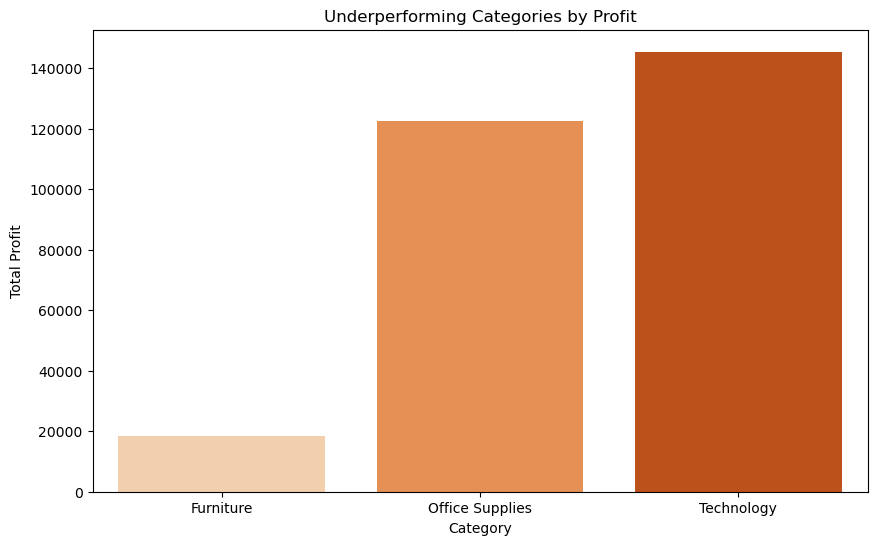

In [144]:
underperforming_categories = df.groupby("Category")[['Sales', 'Profit']].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=underperforming_categories.index, y=underperforming_categories["Sales"], hue=underperforming_categories.index, legend=False, palette="Reds")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Underperforming Categories by Sales")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=underperforming_categories.index, y=underperforming_categories["Profit"], hue=underperforming_categories.index, legend=False, palette="Oranges")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.title("Underperforming Categories by Profit")
plt.show()

# -- Sales Insights

1️⃣ Region with the Highest Sales

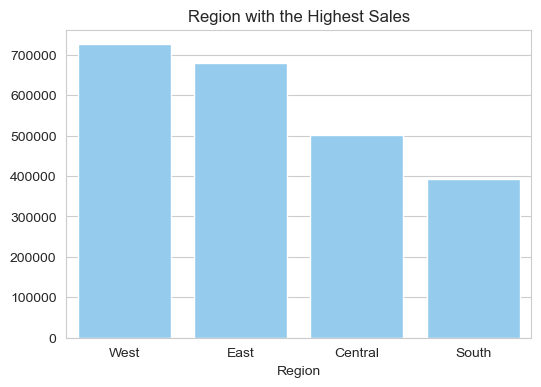

In [376]:
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=region_sales.index, y=region_sales.values, color="lightskyblue")
plt.title("Region with the Highest Sales")
plt.show()


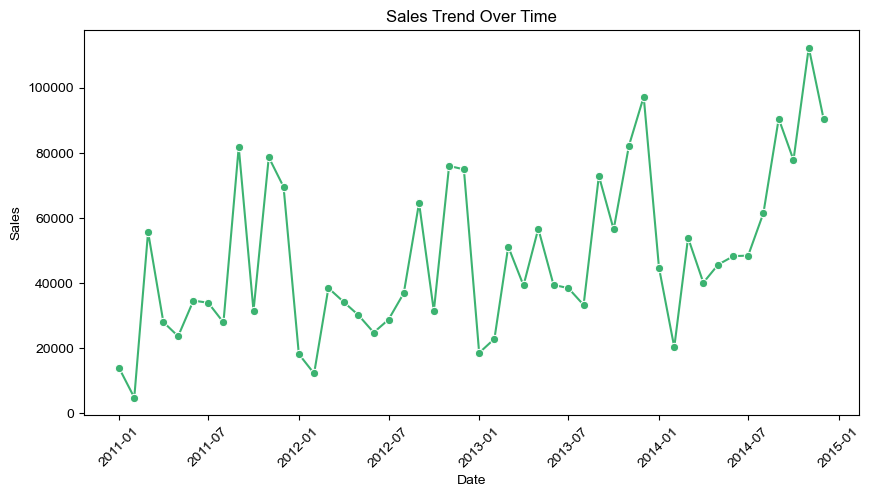

In [188]:
time_sales = df.groupby(["Order Year", "Order Month"])["Sales"].sum().reset_index()
time_sales["Date"] = pd.to_datetime(time_sales["Order Year"].astype(str) + "-" + time_sales["Order Month"].astype(str))

plt.figure(figsize=(10, 5))
sns.lineplot(data=time_sales, x="Date", y="Sales", marker="o", color="mediumseagreen")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.show()

3️⃣ Top Ten State by Product Sold 

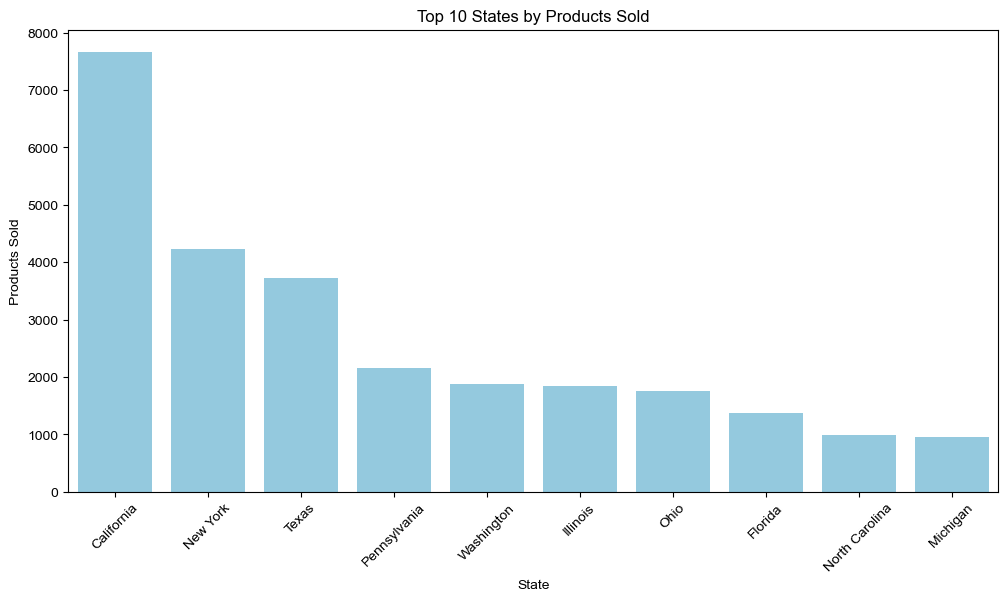

In [216]:
# 1. Group products sold by state
state_products_sold = df.groupby("State")["Quantity"].sum().sort_values(ascending=False)

# 2. Select the top 10 states based on products sold
top_state_products_sold = state_products_sold.head(10)

plt.figure(figsize=(12, 6))

# 3. Create a vertical bar plot with a different color
sns.barplot(x=top_state_products_sold.index, y=top_state_products_sold.values, color="skyblue")

plt.xlabel("State")
plt.ylabel("Products Sold")
plt.title("Top 10 States by Products Sold")

plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.show()

4️⃣ Top 10 Cities by Sales

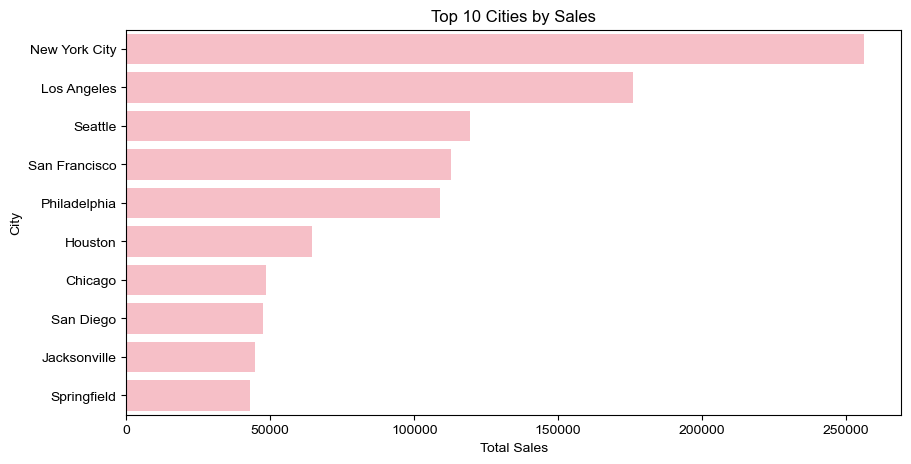

In [203]:
top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.values, y=top_cities.index, color="lightpink")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.title("Top 10 Cities by Sales")
plt.show()

5️⃣ States Generating the Most Profit

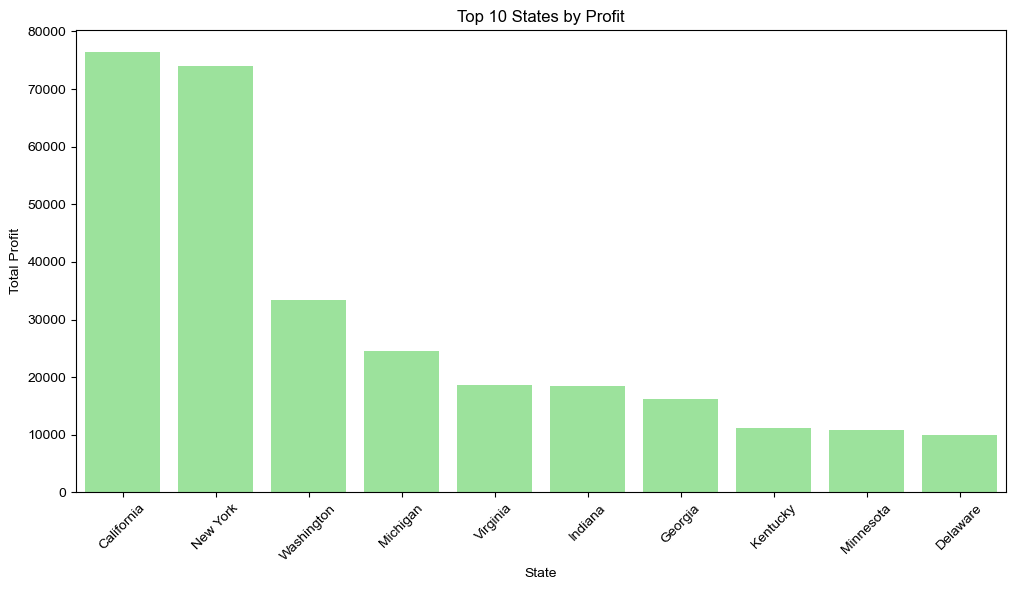

In [218]:
# 1. Group profits by state and sort in descending order
state_profit = df.groupby("State")["Profit"].sum().sort_values(ascending=False)

# 2. Select the top 10 states based on profit
top_state_profit = state_profit.head(10)

plt.figure(figsize=(12, 6))

# 3. Create a vertical bar plot to visualize the profit for each state
sns.barplot(x=top_state_profit.index, y=top_state_profit.values, color="lightgreen")

plt.xlabel("State")
plt.ylabel("Total Profit")
plt.title("Top 10 States by Profit")

plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.show()

6️⃣ States & Cities with Consistently Low Sales or Profit

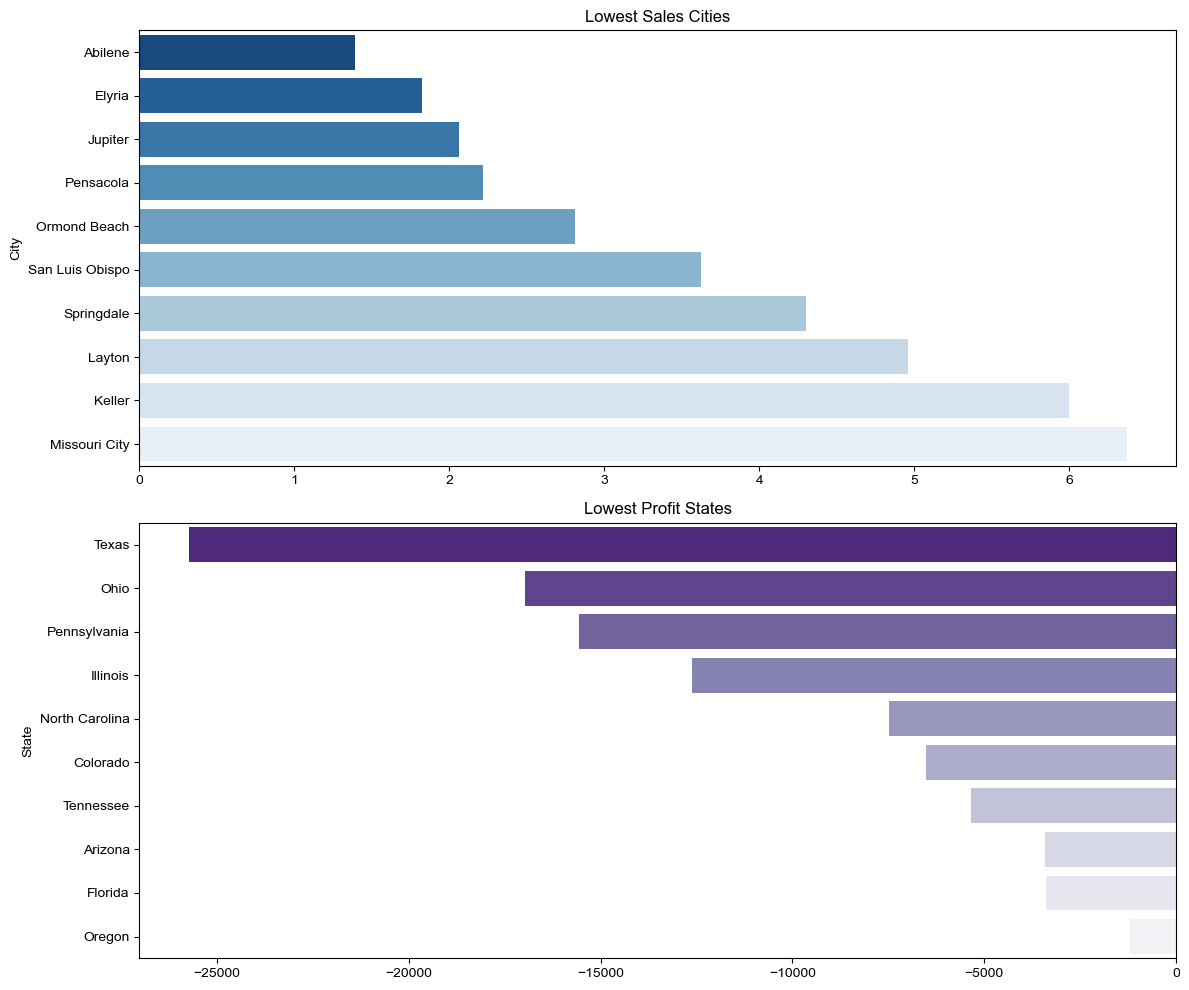

In [225]:
# 1. Group cities by sales and sort by smallest sales (low sales cities)
low_sales_cities = df.groupby("City")["Sales"].sum().nsmallest(10)

# 2. Group states by profit and sort by smallest profit (low profit states)
low_profit_states = df.groupby("State")["Profit"].sum().nsmallest(10)

# 3. Set up the figure and axes for two subplots (one for sales, one for profit)
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# 4. Create a bar plot for the lowest sales cities with gradient color from light to dark
sns.barplot(y=low_sales_cities.index, x=low_sales_cities.values, hue=low_sales_cities.index, palette="Blues_r", ax=axes[0], legend=False)
axes[0].set_title("Lowest Sales Cities")

# 5. Create a bar plot for the lowest profit states with gradient color from light to dark
sns.barplot(y=low_profit_states.index, x=low_profit_states.values, hue=low_profit_states.index, palette="Purples_r", ax=axes[1], legend=False)
axes[1].set_title("Lowest Profit States")

# 6. Adjust layout to avoid overlap and make the chart cleaner
plt.tight_layout()

# 7. Show the plots
plt.show()


# -- Shipping and Logistics

1️⃣ Most & Least Used Shipping Mode

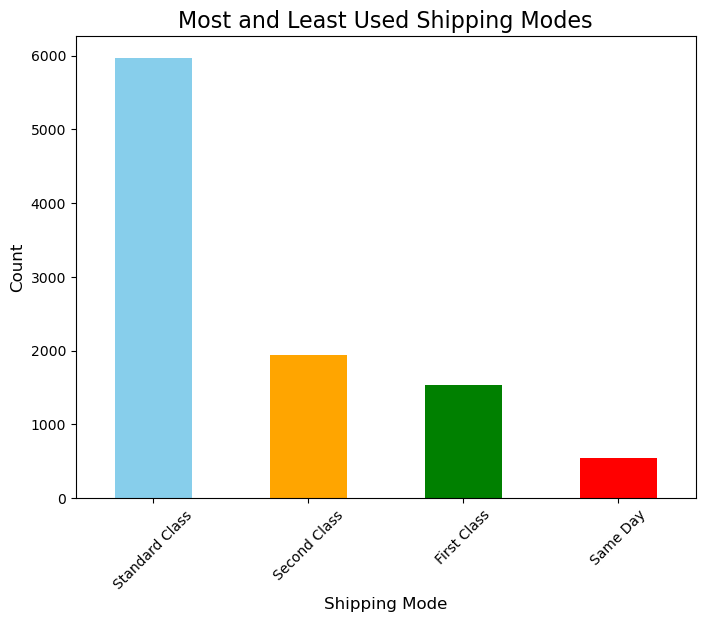

Most used shipping mode: Standard Class
Least used shipping mode: Same Day


In [91]:
# Count occurrences of each shipping mode
shipping_counts = df['Ship Mode'].value_counts()

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
shipping_counts.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'])
plt.title('Most and Least Used Shipping Modes', fontsize=16)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Create shipping_mode_counts
shipping_mode_counts = df['Ship Mode'].value_counts()

# Print the most and least used shipping modes
print("Most used shipping mode:", shipping_mode_counts.idxmax())
print("Least used shipping mode:", shipping_mode_counts.idxmin())

2️⃣ Delivery Trend for Each Shipping Mode Over Time

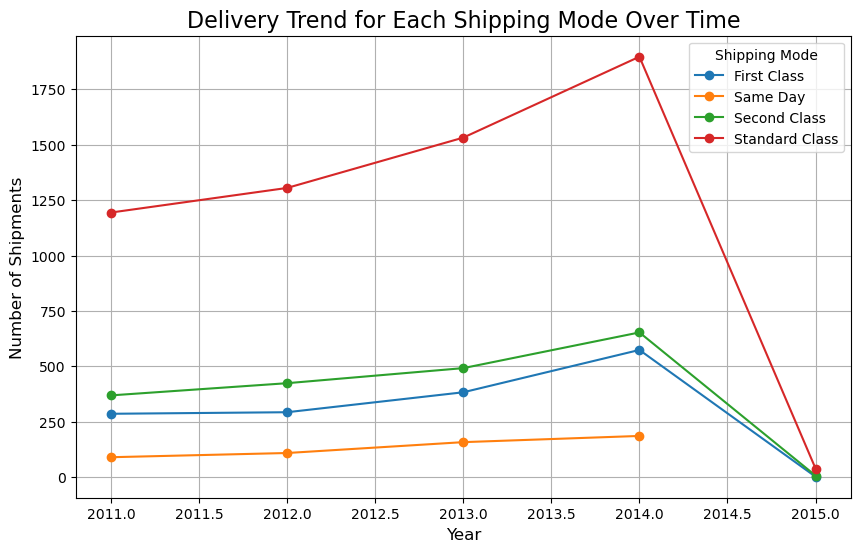

In [84]:
# Group by shipping mode and ship year
shipping_trend = df.groupby(['Ship Year', 'Ship Mode']).size().unstack()

# Plot delivery trend
shipping_trend.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Delivery Trend for Each Shipping Mode Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Shipments', fontsize=12)
plt.legend(title='Shipping Mode')
plt.grid(True)
plt.show()

# Create shipping_mode_counts
shipping_mode_counts = df['Ship Mode'].value_counts()


3️⃣ Impact of Shipping Mode on Profit Margins

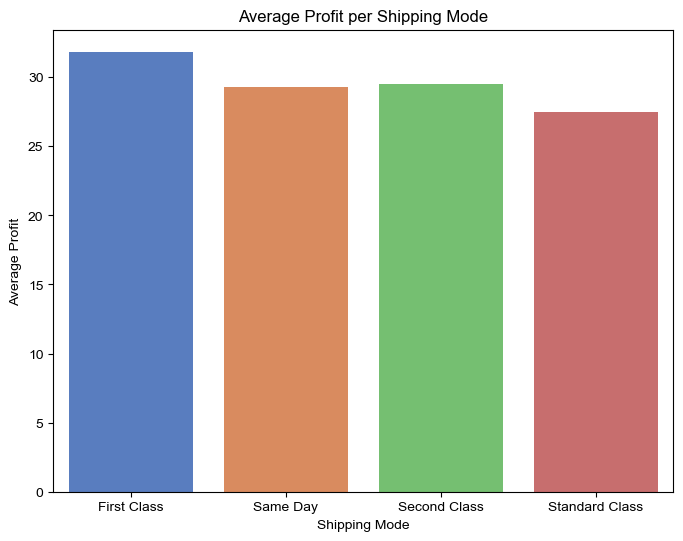

In [250]:
plt.figure(figsize=(8, 6))
avg_profit = df.groupby("Ship Mode")["Profit"].mean().reset_index()

sns.barplot(x="Ship Mode", y="Profit", hue="Ship Mode", data=avg_profit, palette="muted", legend=False)

plt.xlabel("Shipping Mode")
plt.ylabel("Average Profit")
plt.title("Average Profit per Shipping Mode")
plt.show()

4️⃣ Most Commonly Used Shipping Mode by Region

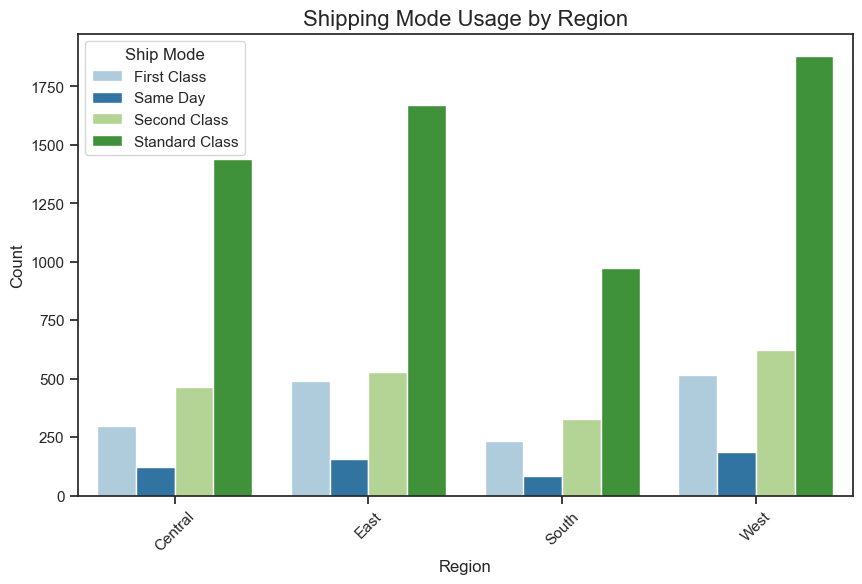

In [114]:
# Group data by region and shipping mode
region_shipping = df.groupby(['Region', 'Ship Mode']).size().reset_index(name='Count')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=region_shipping, x='Region', y='Count', hue='Ship Mode', palette="Paired")
plt.title("Shipping Mode Usage by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Ship Mode")
plt.show()


# -- Time-Based Insights

1️⃣ Peak sales months for each region

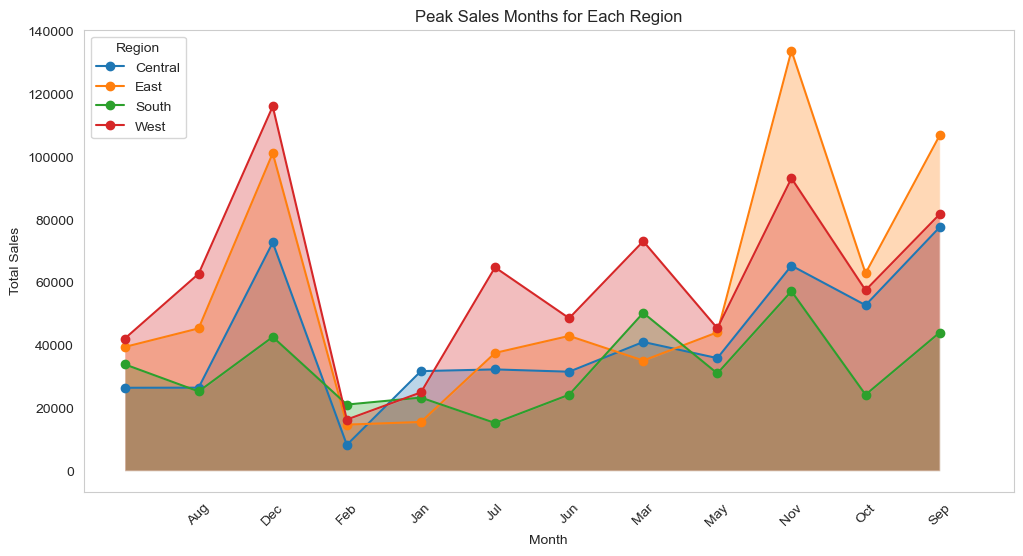

In [342]:
# Group sales data by Region and Order Month, summing the total sales
monthly_sales = df.groupby(['Region', 'Order Month'])['Sales'].sum().reset_index()

# Set figure size
plt.figure(figsize=(12, 6))

# Create an area plot for sales trends across different regions
for region in monthly_sales['Region'].unique():
    region_data = monthly_sales[monthly_sales['Region'] == region]
    plt.plot(region_data['Order Month'], region_data['Sales'], marker='o', label=region)
    plt.fill_between(region_data['Order Month'], region_data['Sales'], alpha=0.3)  # Fill area under the curve

# Set chart title and labels
plt.title('Peak Sales Months for Each Region')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Set x-axis ticks for months
plt.xticks(range(1, 13), rotation=45)  # Rotate for better readability

# Display legend and grid
plt.legend(title='Region')
plt.grid()

# Show the plot
plt.show()

2️⃣ Sales variation by day of the week

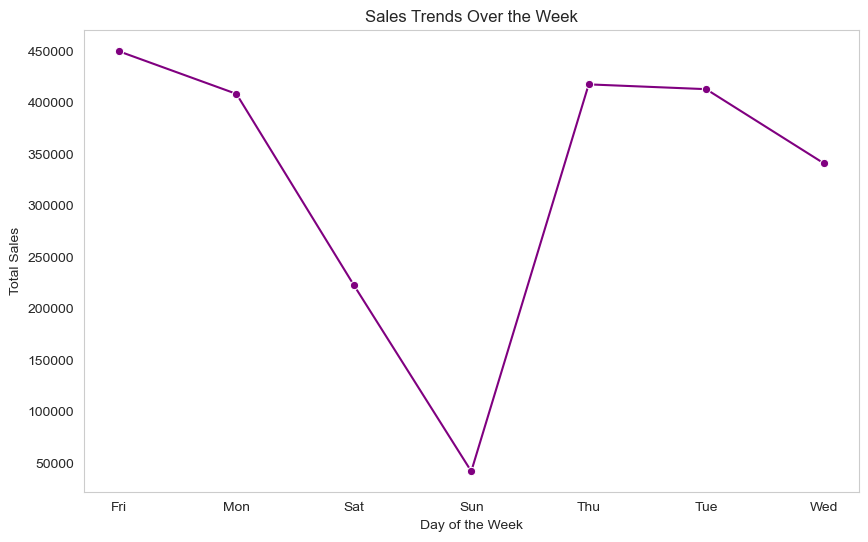

In [349]:
df["Order Day of Week"] = df["Order Day of Week"].map(lambda x: calendar.day_abbr[x])

sales_by_day = df.groupby("Order Day of Week")["Sales"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_day, x="Order Day of Week", y="Sales", marker="o", color="purple")
plt.title("Sales Trends Over the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

3️⃣ Seasonal trends in sales and profit

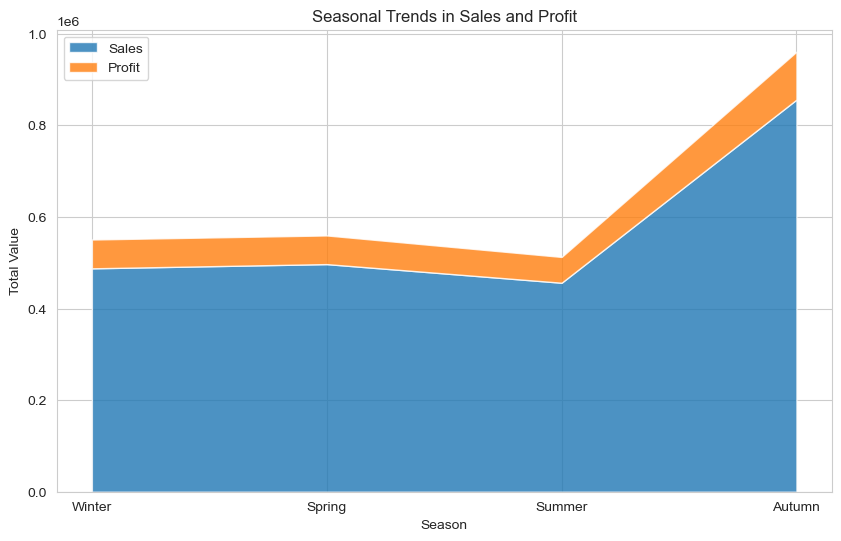

In [364]:
def get_season(month):
    if month in ["Dec", "Jan", "Feb"]:
        return 'Winter'
    elif month in ["Mar", "Apr", "May"]:
        return 'Spring'
    elif month in ["Jun", "Jul", "Aug"]:
        return 'Summer'
    else:
        return 'Autumn'
        

# Load the dataset (Ensure df is already defined before running this code)
df['Season'] = df['Order Month'].apply(get_season)

# Group by Season and sum Sales & Profit
seasonal_sales_profit = df.groupby("Season")[["Sales", "Profit"]].sum().reset_index()

# Set season order (ensuring correct chronological order)
season_order = ["Winter", "Spring", "Summer", "Autumn"]
seasonal_sales_profit["Season"] = pd.Categorical(
    seasonal_sales_profit["Season"], 
    categories=season_order, 
    ordered=True
)
seasonal_sales_profit = seasonal_sales_profit.sort_values("Season")

# Plot stacked area chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.stackplot(seasonal_sales_profit["Season"], 
              seasonal_sales_profit["Sales"], 
              seasonal_sales_profit["Profit"], 
              labels=["Sales", "Profit"], 
              colors=["#1f77b4", "#ff7f0e"], alpha=0.8)

plt.xlabel("Season")
plt.ylabel("Total Value")
plt.title("Seasonal Trends in Sales and Profit")
plt.legend()
plt.show()


# -- Additional Insights

1️⃣ The impact of different regions on sales performance.

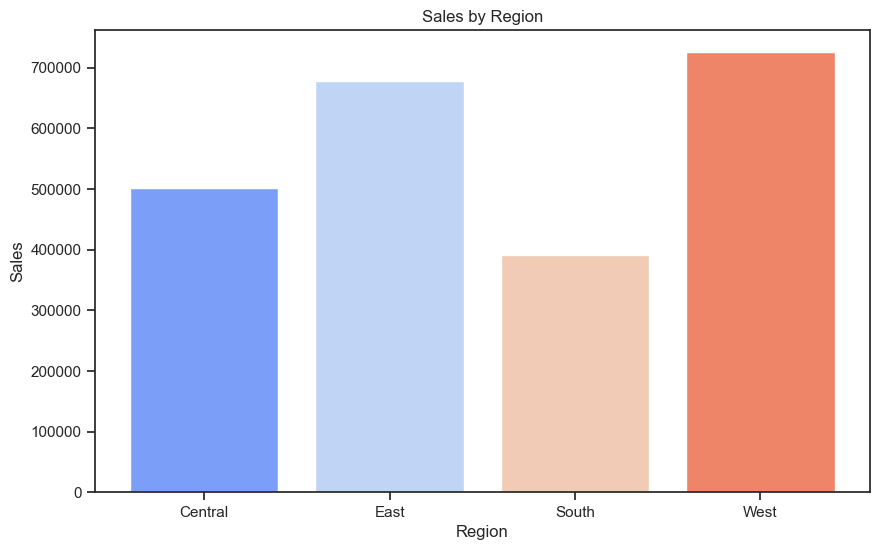

In [120]:
# Create the bar plot using matplotlib
plt.figure(figsize=(10,6))
plt.bar(data=region_sales, x='Region', height='Sales', color=sns.color_palette("coolwarm", len(region_sales)))

# Set plot titles and labels
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')

# Display the plot
plt.show()

2️⃣ The relationship between discounts and sales/profit across different product categories.

<Figure size 1000x600 with 0 Axes>

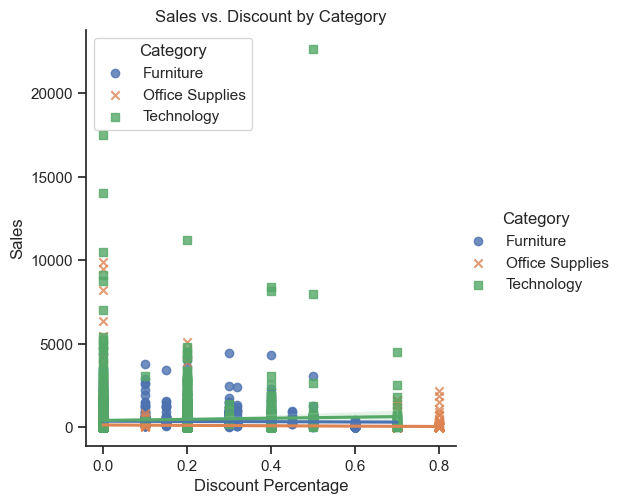

<Figure size 1000x600 with 0 Axes>

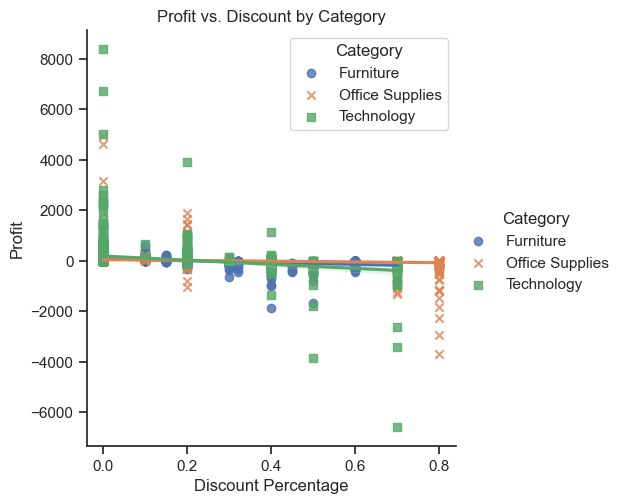

In [149]:
# Plot 1: Sales vs. Discount by Category
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Discount', y='Sales', hue='Category', markers=['o', 'x', 's'])
plt.title('Sales vs. Discount by Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Sales')
plt.legend(title='Category')
plt.show()

# Plot 2: Profit vs. Discount by Category
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Discount', y='Profit', hue='Category', markers=['o', 'x', 's'])
plt.title('Profit vs. Discount by Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Profit')
plt.legend(title='Category')
plt.show()

3️⃣ The percentage of orders that come from repeat customers.

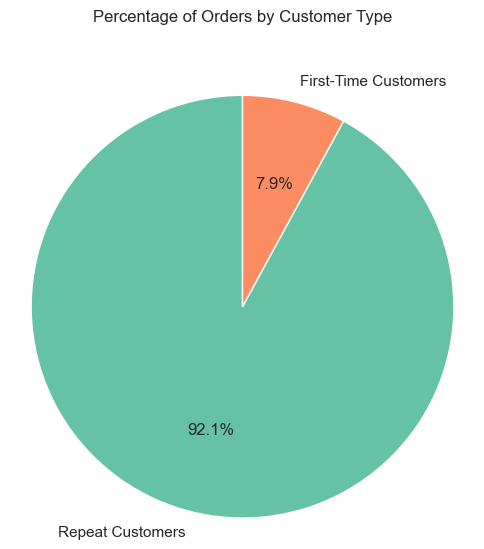

In [145]:
# Calculate order counts
repeat_orders = len(repeat_customers)
first_time_orders = len(first_time_customers)

# Create a pie chart
labels = ['Repeat Customers', 'First-Time Customers']
sizes = [repeat_orders, first_time_orders]
colors = sns.color_palette('Set2', n_colors=2)  # Using seaborn's Set2 palette

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Orders by Customer Type', y=1.1)  # Adjusted title position
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()